# [第4章: 形態素解析](http://www.cl.ecei.tohoku.ac.jp/nlp100/#ch4)
夏目漱石の小説『吾輩は猫である』の文章（[neko.txt](http://www.cl.ecei.tohoku.ac.jp/nlp100/data/neko.txt)）をMeCabを使って形態素解析し，その結果をneko.txt.mecabというファイルに保存せよ．このファイルを用いて，以下の問に対応するプログラムを実装せよ．

なお，問題37, 38, 39は[matplotlib](http://matplotlib.org/)もしくは[Gnuplot](http://www.gnuplot.info/)を用いるとよい．

In [1]:
!ls ../Corpus/neko.txt

../Corpus/neko.txt


In [48]:
import MeCab
from math import log
import matplotlib.pyplot as plt
import pandas as pd
import re
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
sns.set(style="darkgrid", context="notebook", palette="muted")

In [5]:
with open("../Corpus/neko.txt") as neko, open("Output/neko.txt.mecab", mode="w") as neko_mecab:
    tagger = MeCab.Tagger("-d /usr/lib/x86_64-linux-gnu/mecab/dic/mecab-ipadic-neologd")
    sentences = neko.read().replace("　", "").replace("\n", "")
    neko_mecab.write(tagger.parse(sentences))

## 30. 形態素解析結果の読み込み
形態素解析結果（neko.txt.mecab）を読み込むプログラムを実装せよ．ただし，各形態素は表層形（surface），基本形（base），品詞（pos），品詞細分類1（pos1）をキーとするマッピング型に格納し，1文を形態素（マッピング型）のリストとして表現せよ．第4章の残りの問題では，ここで作ったプログラムを活用せよ．

In [6]:
result = []
with open("Output/neko.txt.mecab") as neko_mecab:
    for sentence in neko_mecab:
        if sentence == "EOS\n" or sentence == "\n": continue

        # 表層形\t品詞,品詞細分類1,品詞細分類2,品詞細分類3,活用型,活用形,原形,読み,発音
        morpheme = {}
        foo = sentence.split("\t")
        bar = foo[1].split(",")
        if "*\n" == bar[6]: continue
        morpheme["surface"] = foo[0]
        morpheme["base"] = bar[6]
        morpheme["pos"] = bar[0]
        morpheme["pos1"] = bar[1]
        result.append(morpheme)

## 31. 動詞
動詞の表層形をすべて抽出せよ．

In [7]:
surfaces_verb = set()
for morpheme in result:
    if morpheme["pos"] == "動詞":
        surfaces_verb.add(morpheme["surface"])

surfaces_verb

{'浴びせかけ',
 '萌す',
 'しまえ',
 '告げん',
 '込める',
 '削り取ら',
 '依',
 '吸い',
 'おける',
 '揃っ',
 '乾かす',
 '浴びろ',
 'まえる',
 'ふかす',
 '逢え',
 '廻れ',
 '戻る',
 '抓ん',
 '打ち立て',
 '流れ',
 '読み',
 'してやる',
 '聞きゃ',
 '呑み込ま',
 '罹っ',
 '開く',
 'おくれ',
 '曲げ',
 'おか',
 '懲り',
 '叩き込み',
 'なさっ',
 '躍り出',
 '有し',
 'たまら',
 'くるまっ',
 '挿し',
 '刈り込ん',
 '見て取る',
 '降ら',
 '酔っ払っ',
 '迷わさ',
 '得',
 '開け放っ',
 'しめつける',
 '評する',
 '起つ',
 '諦め',
 '絶つ',
 '限ら',
 '覚える',
 'たくっ',
 'すかし',
 '飛び降り',
 '書き流し',
 'たたく',
 '解さ',
 '供し',
 '握っ',
 '下し',
 '飲み下し',
 'とりのけ',
 'こたえる',
 '振い落し',
 '割り出し',
 '捧げ',
 '引きつけ',
 '喜ぶ',
 '片づい',
 'ふる',
 'かしこまり',
 '求め',
 '差し引か',
 '延び',
 '巻く',
 '落ちる',
 'なわ',
 '比すれ',
 '聞きつけ',
 '威張る',
 'とりとめ',
 '動じ',
 'かえる',
 '知らせ',
 '跳ね返し',
 'ふくらまし',
 '思う',
 'かこつ',
 '込み',
 'いやがれ',
 '上る',
 '斬っ',
 '繰返し',
 'みよ',
 '驚い',
 '吹い',
 'つきつける',
 'あてこすり',
 '見せろ',
 '這い出し',
 '退く',
 '余る',
 'ちまい',
 '問い返さ',
 '潰れる',
 '据わっ',
 'はみ出し',
 'あぶり',
 '転がっ',
 'はなち',
 '繰返す',
 'やりゃ',
 'あつまる',
 'むすん',
 '飛び込め',
 '驚かさ',
 '見せよ',
 '抓ま',
 '伏せ',
 'とまり',
 '行わ',
 'く',
 'ねむり',
 'ねぶっ',
 '消え去っ',
 '通れ',
 'お

## 32. 動詞の原形
動詞の原形をすべて抽出せよ．

In [8]:
bases_verb = set()
for morpheme in result:
    if morpheme["pos"] == "動詞":
        bases_verb.add(morpheme["base"])

bases_verb

{'萌す',
 '込める',
 '融ける',
 '適す',
 'おける',
 'ちょろまかす',
 '燻る',
 'いじめる',
 'まえる',
 '乾かす',
 'ふかす',
 '思い返す',
 'ゆるむ',
 'してやる',
 '仰向く',
 'フケる',
 'ずれる',
 '開く',
 '廻れる',
 'こしらえる',
 '膨れる',
 'すかす',
 '歴る',
 '見て取る',
 'ふくらます',
 '得',
 'あてこする',
 '起つ',
 'しめつける',
 '評する',
 '浚う',
 '染め出す',
 'まつ',
 '絶つ',
 '覚える',
 '砕く',
 'たたく',
 'ます',
 '熾る',
 'こたえる',
 '引き取る',
 '喜ぶ',
 'ふる',
 '勝れる',
 '巻く',
 '落ちる',
 '外れる',
 '捉える',
 '威張る',
 'かえる',
 '睨める',
 '殖える',
 '思う',
 'かこつ',
 '心掛ける',
 'むき出す',
 '見識張る',
 '上る',
 'つきつける',
 'ころばす',
 '余る',
 '退く',
 '潰れる',
 '踏みつける',
 '繰返す',
 'あつまる',
 '究める',
 'あばく',
 '死ねる',
 '費やす',
 '納める',
 'く',
 'ぶらさがる',
 '歩み寄る',
 'しかめる',
 '乗り出す',
 '用いる',
 '発する',
 'かかる',
 '暮らす',
 '痛み入る',
 'しでかす',
 '病む',
 'さておく',
 '飲み込む',
 '落ちつく',
 'つつむ',
 '措く',
 'ねじる',
 '進める',
 '埋る',
 '労する',
 '読み直す',
 '抜き取る',
 '漬ける',
 '曇る',
 '迂る',
 '死ぬ',
 '向き直る',
 '移る',
 '蒔く',
 '通う',
 '褪める',
 '積み込む',
 '捕る',
 '心付く',
 '起きる',
 '脱ぐ',
 '透す',
 '調べる',
 '振り返る',
 '学ぶ',
 '隣る',
 'しゃべる',
 '取り留める',
 '禿げる',
 '受け合える',
 '送る',
 '掛る',
 'とばす',
 'きつける',
 'しだす',
 'とおる',
 'くだける'

## 33. サ変名詞
サ変接続の名詞をすべて抽出せよ．

In [9]:
surfaces_noun_sa = set()
for morpheme in result:
    if morpheme["pos"] == "名詞" and morpheme["pos1"] == "サ変接続":
        surfaces_noun_sa.add(morpheme["base"])

surfaces_noun_sa

{'滅亡',
 '拱手',
 '根治',
 '営業',
 '紹介',
 '一致',
 '長居',
 '再来',
 '連鎖',
 '猶予',
 '独立',
 '料理',
 '敬意',
 '帰着',
 '変化',
 '通信',
 '矛盾',
 '油断',
 '戸締り',
 '煽動',
 '称',
 '謝罪',
 '参上',
 '憤慨',
 '失敬',
 '充満',
 '相違',
 '横断',
 '察',
 '迂回',
 '現前',
 '震動',
 '厚遇',
 '恕',
 'だき',
 '慢心',
 '吐出',
 '注意',
 '真似',
 '解脱',
 '発揮',
 '煩悶',
 '軟化',
 '畏怖',
 '対面',
 '換言',
 '左右',
 '想像',
 '間食',
 '閉居',
 '霊化',
 '合奏',
 'こうか',
 '生長',
 '交戦',
 '朝食',
 '難渋',
 '批評',
 '蓄積',
 '帰国',
 '悪戯',
 '催促',
 '融通',
 '見物',
 '激賞',
 '要心',
 '賛成',
 '全滅',
 '演説',
 '思考',
 'こせこせ',
 '転用',
 '讒訴',
 '出御',
 '芝居',
 '網羅',
 '想見',
 '予知',
 '自慢',
 '遊弋',
 '噂',
 '留守',
 '養成',
 '戦闘',
 '鼎坐',
 '進呈',
 '行動',
 '放下',
 '威圧',
 '献上',
 '畏服',
 '嘲笑',
 '放免',
 '珍重',
 '辞職',
 '潜伏',
 '一睡',
 '佇立',
 '侮辱',
 '占領',
 'ぞくぞく',
 '狼狽',
 '応用',
 '逆戻り',
 '勧誘',
 '威嚇',
 'いらいら',
 '彫刻',
 '濫用',
 'どんと',
 '弁論',
 '吸収',
 '検',
 '関知',
 '通知',
 '速断',
 '伏',
 '捺印',
 '嗜好',
 '考究',
 '云々',
 '鼓吹',
 '身動き',
 '編入',
 '衰退',
 '刻',
 '判然',
 '頓挫',
 '絞殺',
 '九拝',
 '日帰り',
 '貯金',
 '区劃',
 '屹立',
 '思索',
 '薫陶',
 '衝突',
 '屈従',
 '実験',
 '出入',
 '送籍',
 '慰藉',
 

## 34. 「AのB」
2つの名詞が「の」で連結されている名詞句を抽出せよ．

In [10]:
bases_noun = set()
for morpheme in result:
    if morpheme["pos"] == "名詞":
        bases_noun.add(morpheme["base"])

bases_noun

{'滅亡',
 '食指',
 '疱瘡',
 '義勇',
 '以外',
 '通信',
 '親切',
 '後学',
 'らな',
 '朧',
 '屋敷町',
 '長大',
 '教室',
 'ツキ',
 '野呂',
 '棒',
 '小為替',
 '空々',
 'しぐ',
 '足元',
 '溝鼠',
 '織田信長',
 '出御',
 '骨',
 '切先',
 '養成',
 '仙',
 '他方',
 '三年',
 '枠',
 '威圧',
 'とぐろ',
 '徒町',
 '目方',
 '党勢',
 '応用',
 '強情',
 '更',
 '威嚇',
 '表題',
 '製造元',
 '胃腸',
 '苦情',
 '一部始終',
 '文吾',
 '邪道',
 '景色',
 '云々',
 '寄附金',
 '第一義',
 '陣笠',
 '思索',
 '擲',
 'うちの猫',
 '餅屋',
 '沙漠',
 '芽生',
 '名誉',
 '飛花落葉',
 'ごろごろ',
 '変色',
 '帰臥',
 '小屋',
 'あなた',
 '直線',
 '脱稿',
 '機外',
 '先鋒',
 '美人',
 '聖母',
 '鷲',
 '不愉快',
 '義士',
 '水甕',
 'バケツ',
 '沙河',
 '借金',
 '万事',
 '恐れ',
 '闇',
 '権限',
 '内容',
 'こ',
 '秀才',
 '電話',
 '海鼠',
 '内臓',
 '手織',
 '思いのほか',
 '亀屋',
 '団子',
 '孔子',
 '呈',
 '虎',
 '貰',
 '骨肉',
 '種々',
 '自殺',
 '意中の人',
 'すべ',
 '一句',
 '温',
 'あくる日',
 '打ち',
 '弱り目に祟り目',
 'ゆかり',
 '小町',
 '情夫',
 '仏陀',
 '活動',
 '三丁目',
 '目撃',
 '月の光',
 '増加',
 '助',
 '本復',
 '専心',
 'ファンクション',
 '外聞',
 '驚嘆',
 '南郷',
 '切実',
 '牛乳',
 '頁',
 '夫',
 '水薬',
 '霜解け',
 '解釈',
 '皆済',
 '道具',
 '奥',
 '先日',
 '山羊',
 '蒲鉾',
 '満身',
 '夢中',
 '冷淡',
 '天保',
 '僕',
 '垣',


In [11]:
noun_no_noun = set()
for morpheme in result:
    surface = morpheme["base"]
    if "の" not in surface:
        continue
    match = re.search(r"(.*)の(.*)", surface)
    if match.group(1) in bases_noun and match.group(2) in bases_noun:
        noun_no_noun.add(surface)

noun_no_noun

{'うちの猫',
 'このまま',
 'この世',
 'この声',
 'この女',
 'この辺',
 'この道',
 'この間',
 'そのうち',
 'そのため',
 'そのほか',
 'そのまま',
 'その他',
 'その後',
 'その昔',
 'その歌',
 'その間',
 '一杯のビール',
 '世の中',
 '中の間',
 '亀の甲',
 '二の腕',
 '二人の女',
 '人間の声',
 '今日の天気',
 '今日の詩',
 '卒業の日',
 '君の名前',
 '君の国',
 '君の詩',
 '君の話',
 '夏の夜',
 '天の河',
 '奥の間',
 '女の子',
 '宵の口',
 '尊敬の念',
 '山の上',
 '山の芋',
 '岩の上',
 '年の功',
 '床の間',
 '思いのほか',
 '日の出',
 '春の日',
 '最後の手段',
 '月の光',
 '木の葉',
 '本来の面目',
 '松の木',
 '板の間',
 '次の間',
 '気の毒',
 '水の上',
 '池の上',
 '火の手',
 '火の車',
 '猫の恋',
 '猫の額',
 '男の子',
 '緑の黒髪',
 '腋の下',
 '腹の中',
 '自殺の方法',
 '茶の木',
 '茶の間',
 '茶碗の中',
 '血の道',
 '袖の下',
 '身の丈',
 '身の上',
 '身の毛',
 '香の物',
 '馬の骨'}

## 35. 名詞の連接
名詞の連接（連続して出現する名詞）を最長一致で抽出せよ．

In [12]:
concats_noun = set()

idx = 0
while idx < len(result):
    if result[idx]["pos"] != "名詞" or result[idx+1]["pos"] != "名詞":
        idx += 1
        continue

    concat_noun = result[idx]["base"] + result[idx+1]["base"]
    idx += 2
    while idx < len(result) and result[idx]["pos"] == "名詞":
        concat_noun += result[idx]["base"]
        idx += 1
    concats_noun.add(concat_noun)

concats_noun

{'二六時中精細',
 '事心配そう',
 '後進生',
 '言草がさ',
 '柘榴口',
 '一メートル',
 '二三片',
 '通り針箱',
 '一塊りなげ',
 '主人一人',
 'そりゃ昔',
 '間違',
 'あらそうじゃない',
 '大道易者',
 '大和魂さと',
 '最後屁',
 '進歩しない',
 '風流漢',
 '町内中',
 'なに鴛鴦歌',
 '一順列座',
 '泰西文明',
 '左肺',
 '心そのもの',
 'わたし一人',
 '評論家',
 '候由',
 '審美学協会',
 '肝胆相',
 '武右衛門君下',
 '四十分',
 '是非出席',
 '毬栗坊主',
 '四つ足',
 '声盲',
 '内御礼',
 '百三十',
 '二度三度',
 'そりゃ鼠',
 '了見さ',
 '何年',
 '主人以上',
 '通りどこ',
 '大分充血',
 '只他',
 '一人同窓中',
 '四五通',
 '薫風南',
 'ご苦労千万',
 '外ずし',
 '最前書斎',
 '金柑頭',
 '上の峠',
 '螺旋鋲',
 '皆命懸け',
 '通り消極的',
 '五六歳',
 '十一時',
 '没分暁',
 '材料払底',
 '一番手頃',
 'いつものように砂糖',
 '是非及第',
 '十七八',
 '二三度耳',
 '伯父さん将軍家',
 'あなた大変色',
 '本当ら',
 '全体どこ',
 'こないだ東京詰',
 '冷淡以上',
 '近所合壁有名',
 '即値主人',
 '快走船',
 'ざる化装道具',
 '言葉使',
 '君シャンパン',
 '岩見重太郎',
 '陽春白雪',
 '行水盥',
 '当人大分説',
 '毛袋',
 '歌留多会',
 '喜時',
 '煉瓦屋',
 '地蔵さん',
 '聟さん',
 '先祖代々',
 '奇体',
 '時吾輩',
 '二行',
 'メンチボー',
 '段奉賀上候陳',
 '大変賑やか',
 '掛念',
 'ままどっか',
 '平生大事',
 '吾人',
 '野猪的本領',
 '相変わらず太平',
 '十年近く',
 '八木さん',
 '全区天才',
 '吾輩ども',
 '山羊髯',
 '睡眠中',
 '出掛',
 '長さ加減',
 '砂糖壺',
 '晩帰り',
 'まま室内',
 '薄気味',
 '南

## 36. 単語の出現頻度
文章中に出現する単語とその出現頻度を求め，出現頻度の高い順に並べよ．

In [13]:
frequencies = {}
for morpheme in result:
    base = morpheme["base"]
    if base in frequencies:
        frequencies[base] += 1
    else:
        frequencies[base] = 1
frequencies = sorted(frequencies.items(), key=lambda x:x[1], reverse=True)

frequencies

[('の', 9103),
 ('。', 7477),
 ('、', 6772),
 ('て', 6681),
 ('は', 6385),
 ('に', 6175),
 ('を', 6068),
 ('だ', 5837),
 ('と', 5481),
 ('が', 5260),
 ('た', 4196),
 ('する', 3556),
 ('「', 3226),
 ('」', 3225),
 ('ない', 2904),
 ('も', 2434),
 ('ある', 2256),
 ('で', 2091),
 ('から', 2014),
 ('いる', 1735),
 ('か', 1447),
 ('ん', 1416),
 ('云う', 1407),
 ('事', 1175),
 ('です', 1158),
 ('なる', 1114),
 ('ます', 1084),
 ('へ', 1033),
 ('もの', 972),
 ('君', 952),
 ('主人', 928),
 ('う', 918),
 ('ぬ', 703),
 ('よう', 688),
 ('見る', 672),
 ('ね', 647),
 ('この', 635),
 ('ば', 612),
 ('御', 595),
 ('その', 560),
 ('何', 518),
 ('よ', 501),
 ('思う', 498),
 ('吾輩', 477),
 ('来る', 457),
 ('そう', 456),
 ('人', 449),
 ('れる', 447),
 ('…', 433),
 ('じゃ', 429),
 ('これ', 397),
 ('それ', 387),
 ('さ', 383),
 ('聞く', 347),
 ('迷亭', 343),
 ('でも', 342),
 ('行く', 336),
 ('出来る', 322),
 ('時', 312),
 ('ところ', 311),
 ('まで', 304),
 ('一', 299),
 ('方', 294),
 ('な', 294),
 ('やる', 292),
 ('上', 285),
 ('寒月', 278),
 ('先生', 274),
 ('いい', 270),
 ('くらい', 269),
 ('出る', 267),
 ('人間', 26

## 37. 頻度上位10語
出現頻度が高い10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

In [17]:
data_top10 = pd.DataFrame({
    "単語": [frequencies[i][0] for i in range(10)],
    "出現頻度": [frequencies[i][1] for i in range(10)],
})
data_top10

,単語,出現頻度
0,の,9103
1,。,7477
2,、,6772
3,て,6681
4,は,6385
5,に,6175
6,を,6068
7,だ,5837
8,と,5481
9,が,5260


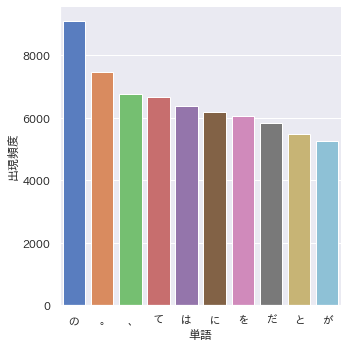

In [18]:
sns.catplot(x="単語", y="出現頻度", data=data_top10, kind="bar")

## 38. ヒストグラム
単語の出現頻度のヒストグラム（横軸に出現頻度，縦軸に出現頻度をとる単語の種類数を棒グラフで表したもの）を描け．

In [37]:
foo = {}
for frequency in frequencies:
    if frequency[1] in foo:
        foo[frequency[1]] += 1
    else:
        foo[frequency[1]] = 1
foo = sorted(foo.items(), key=lambda x:x[0], reverse=True)

data_count = pd.DataFrame({
    "出現頻度": [bar[0] for bar in foo],
    "単語の種類数": [bar[1] for bar in foo],
})
data_count.head(10)

,出現頻度,単語の種類数
0,9103,1
1,7477,1
2,6772,1
3,6681,1
4,6385,1
5,6175,1
6,6068,1
7,5837,1
8,5481,1
9,5260,1


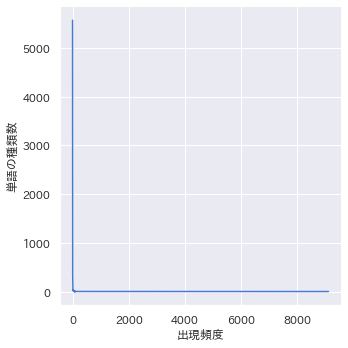

In [38]:
sns.relplot(x="出現頻度", y="単語の種類数", data=data_count, kind="line")

## 39. Zipfの法則
単語の出現頻度順位を横軸，その出現頻度を縦軸として，両対数グラフをプロットせよ．

In [52]:
rank_log = []
count_log = []
count = 0
for idx, frequency in enumerate(frequencies):
    if frequency[1] != count:
        rank = idx + 1
        count = frequency[1]
        print("Rank:%d,Count:%d" % (rank, count))
        rank_log.append(log(rank))
        count_log.append(log(count))

Rank:1,Count:9103
Rank:2,Count:7477
Rank:3,Count:6772
Rank:4,Count:6681
Rank:5,Count:6385
Rank:6,Count:6175
Rank:7,Count:6068
Rank:8,Count:5837
Rank:9,Count:5481
Rank:10,Count:5260
Rank:11,Count:4196
Rank:12,Count:3556
Rank:13,Count:3226
Rank:14,Count:3225
Rank:15,Count:2904
Rank:16,Count:2434
Rank:17,Count:2256
Rank:18,Count:2091
Rank:19,Count:2014
Rank:20,Count:1735
Rank:21,Count:1447
Rank:22,Count:1416
Rank:23,Count:1407
Rank:24,Count:1175
Rank:25,Count:1158
Rank:26,Count:1114
Rank:27,Count:1084
Rank:28,Count:1033
Rank:29,Count:972
Rank:30,Count:952
Rank:31,Count:928
Rank:32,Count:918
Rank:33,Count:703
Rank:34,Count:688
Rank:35,Count:672
Rank:36,Count:647
Rank:37,Count:635
Rank:38,Count:612
Rank:39,Count:595
Rank:40,Count:560
Rank:41,Count:518
Rank:42,Count:501
Rank:43,Count:498
Rank:44,Count:477
Rank:45,Count:457
Rank:46,Count:456
Rank:47,Count:449
Rank:48,Count:447
Rank:49,Count:433
Rank:50,Count:429
Rank:51,Count:397
Rank:52,Count:387
Rank:53,Count:383
Rank:54,Count:347
Rank:55,C

In [53]:
data_zipf = pd.DataFrame({
    "log(出現頻度順位)": rank_log,
    "log(出現頻度)": count_log,
})
data_zipf

,log(出現頻度順位),log(出現頻度)
0,0.000000,9.116359
1,0.693147,8.919587
2,1.098612,8.820552
3,1.386294,8.807023
4,1.609438,8.761707
...,...,...
235,7.871311,1.609438
236,8.042056,1.386294
237,8.230844,1.098612
238,8.471359,0.693147


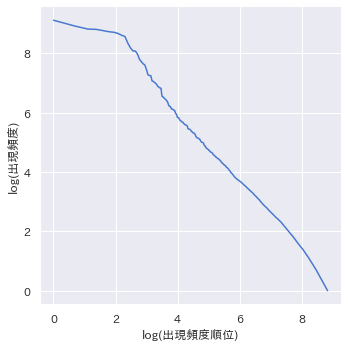

In [55]:
sns.relplot(x="log(出現頻度順位)", y="log(出現頻度)", data=data_zipf, kind="line")